In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

data = pd.read_csv('data.txt')
XX = np.array(data.as_matrix(columns=['alcohol', 'ash']))
#yy = np.array([i - 1 for i in data['class'].values])
yy = np.matrix(label_binarize(data['class'], [1, 2, 3]))[:,0]
yy = np.array(yy.flatten()).ravel()
#print(yy.ravel())

[[ 0.   0. ]
 [ 1.   1. ]
 [ 2.   0. ]
 [-2.   0. ]
 [-1.  -1. ]
 [-1.   1. ]
 [-1.5  1. ]
 [ 3.   3. ]
 [ 3.   0. ]
 [-3.   0. ]
 [ 0.  -3. ]
 [-1.   3. ]
 [ 1.  -2. ]
 [-2.  -1.5]]
[[  1.98247954e-02  -1.98245253e-02]
 [ -7.37038672e-01   7.37038374e-01]
 [  6.14542782e-01  -6.14540339e-01]
 [  9.76902068e-01  -9.76900697e-01]
 [ -6.20813924e-04   6.21083658e-04]]
[-3.75999165  3.75999284]
res 1
res 1
res 1
res 1
res 1
res 1
res 1
res 0
res 0
res 0
res 0
res 0
res 0
res 0


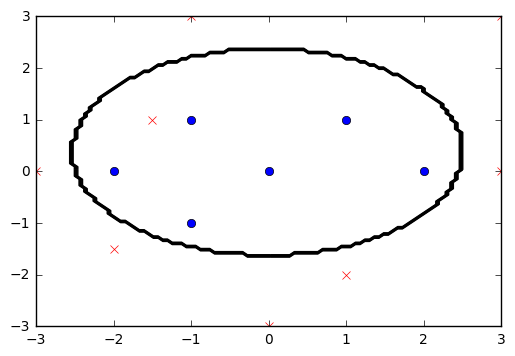

[0 0 0 0 0 0 0 0 0 0]



In [13]:
training_in = numpy.array(
    [[0, 0], [1, 1], [2, 0], [-2, 0], [-1, -1], [-1, 1], [-1.5, 1], [3, 3], [3, 0], [-3, 0], [0, -3], [-1, 3], [1, -2],
     [-2, -1.5]])
training_out = numpy.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])
print(training_in)

def transform_data(x):
    return [x[0], x[1], x[0] ** 2, x[1] ** 2, x[0] * x[1]]

new_training_in = numpy.apply_along_axis(transform_data, 1, training_in)

feature_count = new_training_in.shape[1]

x = tf.placeholder(tf.float32, [None, feature_count])
y = tf.placeholder(tf.int32, [None])

W = tf.Variable(tf.zeros([feature_count, 2]))
b = tf.Variable(tf.zeros([2]))

guess = tf.nn.softmax(tf.matmul(x, W) + b)

cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=tf.matmul(x, W) + b, labels=y))

opti = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    for (item_x, item_y) in zip(new_training_in, training_out):
        sess.run(opti, feed_dict={x: [item_x], y: [item_y]})

print(sess.run(W))
print(sess.run(b))

plt.plot(training_in[:6, 0], training_in[:6, 1], 'bo')
plt.plot(training_in[6:, 0], training_in[6:, 1], 'rx')

def predict(inputs):
    return sess.run(guess, feed_dict={x: inputs})

results = sess.run(guess, feed_dict={x: new_training_in})

for i in range(training_in.shape[0]):
    xx = [training_in[i:, 0]]
    yy = [training_in[i:, 1]]
    res = results[i]

    # this always prints `[ 1.]`
    print('res', res.argmax())

    # uncomment these lines to see the guesses
    #if res[0] == 0:
    #    plt.plot(xx, yy, 'c+')
    #else:
    #    plt.plot(xx, yy, 'g+')
plt.show()
def plot_boundary(X):
    
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    inputs = np.c_[xx.ravel(), yy.ravel()]
    new_inputs = numpy.apply_along_axis(transform_data, 1, inputs)
    predictions = predict(new_inputs)
    print(predictions[0:10,0:10].argmax(axis=1))
    #print(predictions.argmax(axis=1)[0:10,:])
    print()
    predictions = predictions.argmax(axis=1).reshape(xx.shape)

    plt.contour(xx, yy, predictions, colors='black', nchunk=50)#, antialiased=True)
    
plot_boundary(training_in)